In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png


In [2]:
import pandas as pd

# Simulated marketing data
data = {
    'Campaign': ['Email_A', 'SocialMedia_B', 'Ads_C', 'Email_D'],
    'Impressions': [10000, 15000, 12000, 9000],
    'Clicks': [500, 700, 600, 400],
    'Conversions': [50, 90, 60, 40],
    'Cost': [1000, 2000, 1500, 800],
    'Campaign_Type': ['Email', 'Social Media', 'Ads', 'Email']
}

df = pd.DataFrame(data)
print(df)


        Campaign  Impressions  Clicks  Conversions  Cost Campaign_Type
0        Email_A        10000     500           50  1000         Email
1  SocialMedia_B        15000     700           90  2000  Social Media
2          Ads_C        12000     600           60  1500           Ads
3        Email_D         9000     400           40   800         Email


In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (if any) using median for numerical data
df['Impressions'].fillna(df['Impressions'].median(), inplace=True)

# Example of standardizing text format
df['Campaign_Type'] = df['Campaign_Type'].str.lower()
# the red color paragraph is not an error its a warning

Campaign         0
Impressions      0
Clicks           0
Conversions      0
Cost             0
Campaign_Type    0
dtype: int64


/tmp/ipykernel_36/2664931948.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Impressions'].fillna(df['Impressions'].median(), inplace=True)


In [6]:
# Click-Through Rate (CTR) = (Clicks / Impressions) * 100
df['CTR (%)'] = (df['Clicks'] / df['Impressions']) * 100

# Conversion Rate = (Conversions / Clicks) * 100
df['Conversion Rate (%)'] = (df['Conversions'] / df['Clicks']) * 100

# Cost per Acquisition (CPA) = Cost / Conversions
df['CPA ($)'] = df['Cost'] / df['Conversions']

# Assuming we have a column for Revenue generated by each campaign
df['Revenue'] = [3000, 5000, 4500, 2500]

# Return on Investment (ROI) = ((Revenue - Cost) / Cost) * 100
df['ROI (%)'] = ((df['Revenue'] - df['Cost']) / df['Cost']) * 100

# Display the updated DataFrame with calculated metrics
print(df)


        Campaign  Impressions  Clicks  Conversions  Cost Campaign_Type  \
0        Email_A        10000     500           50  1000         email   
1  SocialMedia_B        15000     700           90  2000  social media   
2          Ads_C        12000     600           60  1500           ads   
3        Email_D         9000     400           40   800         email   

    CTR (%)  Conversion Rate (%)    CPA ($)  Revenue  ROI (%)  
0  5.000000            10.000000  20.000000     3000    200.0  
1  4.666667            12.857143  22.222222     5000    150.0  
2  5.000000            10.000000  25.000000     4500    200.0  
3  4.444444            10.000000  20.000000     2500    212.5  


<Figure size 1000x600 with 0 Axes>

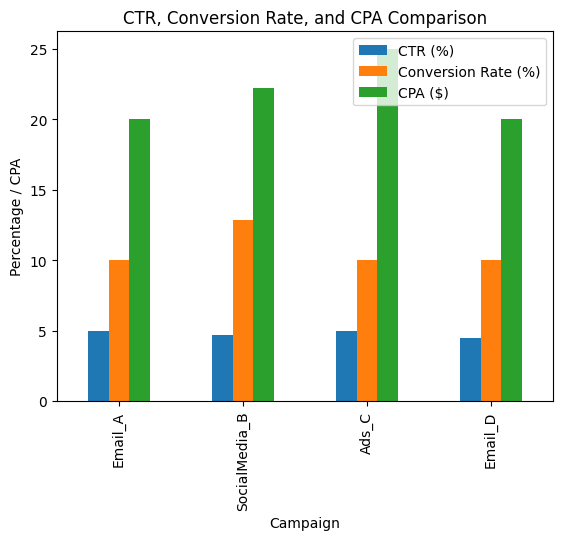

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for CTR, Conversion Rate, and CPA across campaigns
plt.figure(figsize=(10, 6))
df[['Campaign', 'CTR (%)', 'Conversion Rate (%)', 'CPA ($)']].set_index('Campaign').plot(kind='bar')
plt.title('CTR, Conversion Rate, and CPA Comparison')
plt.ylabel('Percentage / CPA')
plt.show()



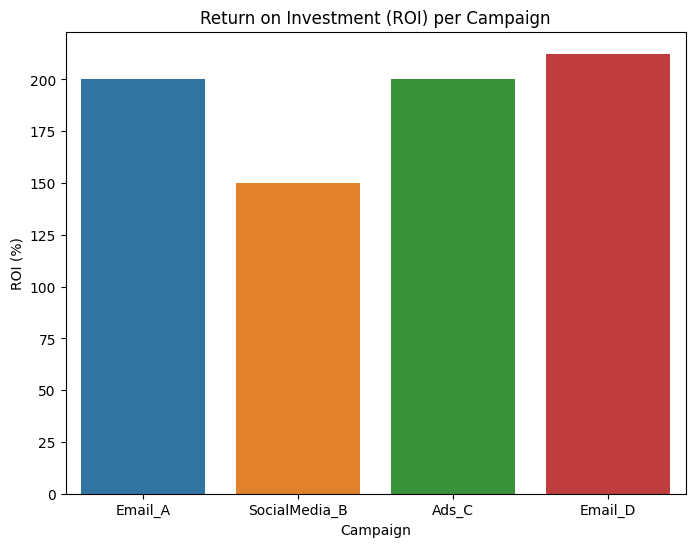

In [8]:
# Bar chart for ROI across campaigns
plt.figure(figsize=(8, 6))
sns.barplot(x='Campaign', y='ROI (%)', data=df)
plt.title('Return on Investment (ROI) per Campaign')
plt.ylabel('ROI (%)')
plt.show()


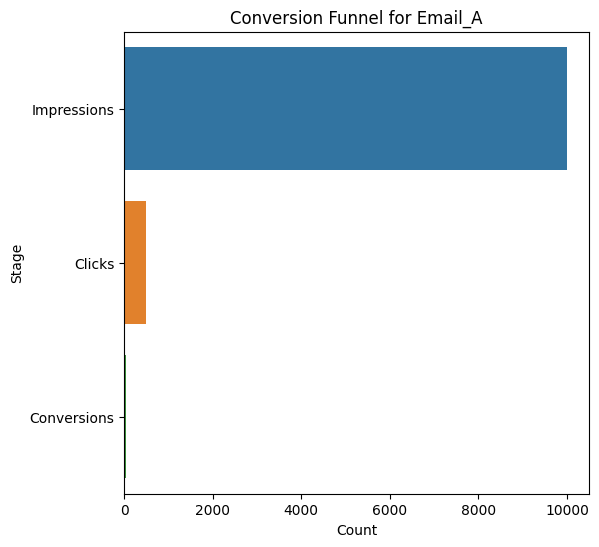

In [9]:
# Plot a funnel for one campaign (Impressions -> Clicks -> Conversions)
campaign = df.iloc[0]  # Select one campaign, e.g., the first one

funnel_data = {
    'Stage': ['Impressions', 'Clicks', 'Conversions'],
    'Count': [campaign['Impressions'], campaign['Clicks'], campaign['Conversions']]
}
funnel_df = pd.DataFrame(funnel_data)

# Create the funnel chart
plt.figure(figsize=(6, 6))
sns.barplot(x='Count', y='Stage', data=funnel_df)
plt.title(f"Conversion Funnel for {campaign['Campaign']}")
plt.show()
